In [113]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, ELU, BatchNormalization
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam, SGD
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [114]:
data = pd.read_csv("realBetterSimulation.csv", index_col=0)

In [115]:
Y = data["sigma"]
X = data.drop(columns=["sigma"], axis=1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [140]:
model = Sequential()
t_l = []
v_l = []

In [141]:
model.add(Dense(200, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(300))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dense(300))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dense(1, activation='relu'))
model.compile(optimizer=Adam(learning_rate=0.005), loss="mae")

In [142]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 200)               1200      
                                                                 
 batch_normalization_87 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 200)               0         
                                                                 
 dense_109 (Dense)           (None, 300)               60300     
                                                                 
 batch_normalization_88 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 elu_66 (ELU)                (None, 300)             

In [143]:
history = model.fit(X_train, y_train,
                    batch_size=10240, epochs=60,
                    validation_split = 0.1,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/60


/Users/macongcong/opt/anaconda3/envs/tensorflow_silicon/lib/python3.9/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2023-04-16 22:40:00.204835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.4938

2023-04-16 22:40:03.652569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 4s 123ms/step - loss: 0.4938 - val_loss: 0.5669
Epoch 2/60
24/24 [==============================] - 2s 63ms/step - loss: 0.2437 - val_loss: 0.6728
Epoch 3/60
24/24 [==============================] - 1s 62ms/step - loss: 0.1451 - val_loss: 1.8045
Epoch 4/60
24/24 [==============================] - 1s 63ms/step - loss: 0.0924 - val_loss: 1.2286
Epoch 5/60
24/24 [==============================] - 1s 59ms/step - loss: 0.1096 - val_loss: 0.6434
Epoch 6/60
24/24 [==============================] - 1s 55ms/step - loss: 0.0868 - val_loss: 0.3062
Epoch 7/60
24/24 [==============================] - 1s 54ms/step - loss: 0.0763 - val_loss: 0.2225
Epoch 8/60
24/24 [==============================] - 1s 56ms/step - loss: 0.0640 - val_loss: 0.1602
Epoch 9/60
24/24 [==============================] - 1s 56ms/step - loss: 0.0646 - val_loss: 0.1365
Epoch 10/60
24/24 [==============================] - 1s 56ms/step - loss: 0.0652 - val_loss: 0.1597
Epoch 11/60
24/24 [

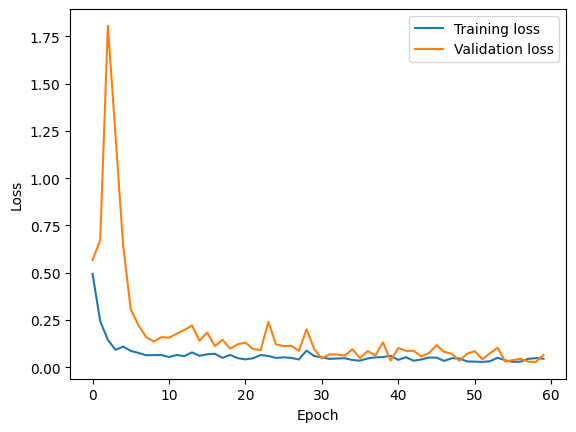

In [144]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
t_l.extend(train_loss) # combining two lists
v_l.extend(val_loss)
plt.plot(t_l, label='Training loss')
plt.plot(v_l, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('volModelWithBetterData.png')
plt.show()

In [93]:
y_pred = model.predict(X_test)

  1/938 [..............................] - ETA: 2:55

2023-04-16 21:18:17.622316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 5s 5ms/step


In [94]:
pd.DataFrame(y_test)

,sigma
4941,0.874242
51775,0.719697
115253,0.496465
299321,0.693939
173570,0.367677
...,...
199500,0.075758
244038,0.547980
79446,0.556566
276390,0.427778


In [95]:
pd.DataFrame(y_pred)

,0
0,0.909092
1,0.667567
2,0.482918
3,0.746127
4,0.340762
...,...
29995,0.010313
29996,0.556782
29997,0.547740
29998,0.406404


/var/folders/jv/604w31hs1v964hc3p1jvb1c40000gn/T/ipykernel_38041/2728979078.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mae, shade=True)


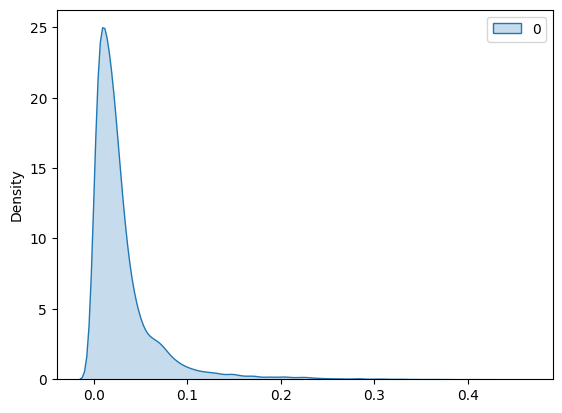

In [100]:
mae = np.abs(y_test.values.reshape(len(y_test), 1) - y_pred)
sns.kdeplot(mae, shade=True)
plt.savefig("density.png")
# we could see huge outliers

In [97]:
subData = X_test.copy()
subData["mae"] = mae

In [98]:
subData.describe()

,S,T,r,K,call_price,mae
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04
mean,254.891536,1.541366,0.020020,255.001973,58.465740,3.106130e-02
std,141.639387,0.842933,0.005819,141.960330,51.090608,3.980244e-02
min,10.000000,0.082192,0.010000,9.213894,0.001264,7.182661e-08
25%,131.641642,0.812374,0.015051,131.443616,18.689514,9.182771e-03
50%,255.245245,1.545477,0.020101,255.399301,43.083930,1.943898e-02
75%,377.377377,2.266897,0.025152,376.989330,84.792443,3.565710e-02
max,500.000000,3.000000,0.030000,541.902239,273.816879,4.518757e-01


In [88]:
subData[subData["mae"] > 0.1].describe()

,S,T,r,K,call_price,mae
count,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000,3237.000000
mean,156.873642,1.498385,0.021246,156.156541,43.817243,0.139931
std,154.852913,1.019846,0.005816,154.312068,61.271174,0.046932
min,10.000000,0.082192,0.010000,9.213894,0.028808,0.100013
25%,30.600601,0.295405,0.016465,30.604765,4.981447,0.108182
50%,54.144144,1.589288,0.021919,54.140547,14.876765,0.124406
75%,299.389389,2.462586,0.026364,295.997551,44.215983,0.151046
max,500.000000,3.000000,0.030000,525.182472,273.816879,0.514339


In [89]:
subData[subData["mae"] < 0.1].describe()

,S,T,r,K,call_price,mae
count,26763.000000,26763.000000,26763.000000,26763.000000,26763.000000,26763.000000
mean,266.746856,1.546565,0.019872,266.957384,60.237484,0.043409
std,135.226161,0.818818,0.005802,135.595993,49.426062,0.027105
min,10.000000,0.082192,0.010000,9.416600,0.001264,0.000002
25%,149.789790,0.829898,0.014848,149.876671,21.932862,0.020696
50%,265.545546,1.542556,0.019899,265.358467,46.516511,0.040532
75%,384.734735,2.246452,0.024949,384.229557,86.181821,0.064574
max,500.000000,3.000000,0.030000,541.902239,271.896484,0.099986


In [101]:
model.save('vol_model.h5')